<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [238]:
# ANSWER
titanic_csv = 'titanic_train.csv'
df = pd.read_csv(titanic_csv)

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [239]:
# ANSWER
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
df.drop(columns=['Cabin'], inplace=True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [242]:
#shows all null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [243]:
#finds all null values in Age column
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [244]:
#replace with mean age
df["Age"].fillna(df.Age.mean(), inplace=True)

In [245]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [246]:
df['Embarked'] = df['Embarked'].fillna('S')

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [217]:
# ANSWER
X = df[['Pclass' , 'Parch']]
y = df.Survived

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [57]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [58]:
# ANSWER
# Create Model
model = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [59]:
# ANSWER
# Fit Model
model.fit(X_train,y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [60]:
# ANSWER
model.score(X_test,y_test)
#model had 68% of the answers correct
#score(X, y[, sample_weight]) Return the mean accuracy on the given test data and labels.

0.6888888888888889

In [66]:
print("Train Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

Train Accuracy: 0.6878901373283396
Test Accuracy: 0.6888888888888889


The computed intercept (`intercept_`) is the 1st element of another array:

In [61]:
# ANSWER
model.intercept_

array([1.31866304])

We can create tuples of the predictor names and coefficients like this:

In [62]:
# ANSWER
feature_cols = X
print(set(zip(feature_cols, model.coef_[0])))

{('Pclass', -0.8453140612795464), ('Parch', 0.27137699842666646)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [64]:
for col in zip(X_train.columns, model.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.845314
Parch       +0.271377


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [68]:
# ANSWER
from sklearn.metrics import accuracy_score

What is the  `accuracy_score` for the test data?

In [69]:
# ANSWER
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6888888888888889

What can we say aout this result?

ANSWER
- accuracy_score and .score both return the mean accuracy on the given test and labels,
-  the model accurately predicted whether or not a person survived 68.88% of the time 

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [70]:
# ANSWER
# ~replaced in EDA above~

In [72]:
# Build Model
X = df[['Pclass' , 'Parch', "Age"]]
y = df.Survived
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=1)
lr = LogisticRegression()
# Fit Model
lr.fit(X_train2, y_train2)
# Score
lr.score(X_test2,y_test2)

0.7333333333333333

So, including age did little to reduce the variance in our model. Why might this be?

<AxesSubplot:>

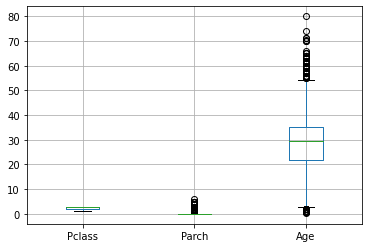

In [83]:
df.boxplot(column=['Pclass', 'Parch', 'Age'])

ANSWER

- Age has alot of outlier values out of the IQR
- Adding that feature without removing the outliers will not reduce variance in the model
- ...

Let's see where the model is going wrong by showing the Confusion Matrix:

In [93]:
# ANSWER
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred_class = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[44  9]
 [19 18]]


Nb. Here is how `confusion_matrix` arranges its output:

<AxesSubplot:>

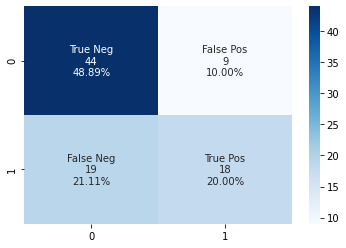

In [132]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred_class)
df_cm = pd.DataFrame(cf_matrix)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [135]:
print("Accuracy is: (TP+TN)/Total = (18+44)/90 = 68.9%")
print("Error is: (FP+FN)/Total = (18+44)/90 = 31.1%")

Accuracy is: (TP+TN)/Total = (18+44)/90 = 68.9%
Error is: (FP+FN)/Total = (18+44)/90 = 31.1%


In [108]:
#corrected array to as above
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

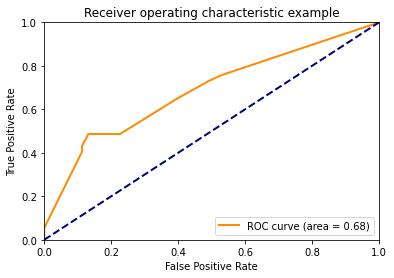

In [94]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [118]:
titanic_with_dummies = pd.get_dummies(data = df, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [128]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male","Sex_female", "Pclass_1", "Pclass_2", "Pclass_3"]].groupby(["Parch", "Sex_male", "Sex_female", "Pclass_1", "Pclass_2", "Pclass_3"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [131]:
# ANSWER
# Set Feature Both Numerical, Categorical
# Build Model
X = titanic_with_dummies[['Age']]
y = df.Survived
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.1, random_state=1)
lr3 = LogisticRegression()
# Fit Model
lr3.fit(X_train3, y_train3)
# Score
lr3.score(X_test3,y_test3)

0.5888888888888889

Plot the ROC curve for the new model:

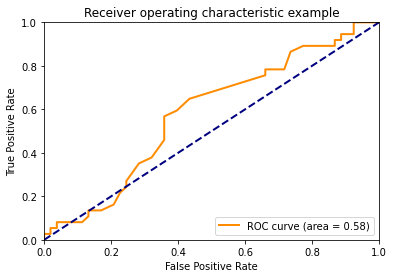

In [115]:
# ANSWER
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds2 = lr3.predict_proba(X_test3)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test3, preds2)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

In [247]:
sex = pd.get_dummies(df['Sex'])
embark = pd.get_dummies(df['Embarked'])
ticket = pd.get_dummies(df['Ticket'],drop_first=True)
df.drop(['PassengerId', 'Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
all_feat = pd.concat([df,sex, embark, ticket],axis=1)

In [220]:
all_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   female    891 non-null    uint8  
 7   male      891 non-null    uint8  
 8   C         891 non-null    uint8  
 9   Q         891 non-null    uint8  
 10  S         891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [248]:
X_train, X_test, y_train, y_test = train_test_split(all_feat.drop('Survived',axis=1), all_feat['Survived'], test_size=0.30, random_state=101)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [231]:
all_feat.info

<bound method DataFrame.info of      Survived  Pclass        Age  SibSp  Parch     Fare  female  male  C  Q  S
0           0       3  22.000000      1      0   7.2500       0     1  0  0  1
1           1       1  38.000000      1      0  71.2833       1     0  1  0  0
2           1       3  26.000000      0      0   7.9250       1     0  0  0  1
3           1       1  35.000000      1      0  53.1000       1     0  0  0  1
4           0       3  35.000000      0      0   8.0500       0     1  0  0  1
..        ...     ...        ...    ...    ...      ...     ...   ... .. .. ..
886         0       2  27.000000      0      0  13.0000       0     1  0  0  1
887         1       1  19.000000      0      0  30.0000       1     0  0  0  1
888         0       3  29.699118      1      2  23.4500       1     0  0  0  1
889         1       1  26.000000      0      0  30.0000       0     1  1  0  0
890         0       3  32.000000      0      0   7.7500       0     1  0  1  0

[891 rows x 11 colu

In [249]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
logmodel.score(X_test,y_test)

0.7985074626865671

model improved by including additional features

In [250]:
# ANSWER
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       154
           1       0.83      0.66      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



